In [2]:
import sys
from pathlib import Path
import warnings
from datetime import datetime
from pathlib import Path
import pandas as pd

sys.path.append(str(Path.cwd().parent))
from settings.params import PARAMS, SEED

In [3]:
DIR = PARAMS['file_directory']

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/HomeCredit/train_data_final2.csv')
data

,Unnamed: 0,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,POS_CNT_INSTALMENT_MATURE_CUM,POS_SK_DPD_y,POS_SK_DPD_DEF_y,POS_NAME_CONTRACT_STATUS_Active_y,POS_NAME_CONTRACT_STATUS_Approved_y,POS_NAME_CONTRACT_STATUS_Completed_y,POS_NAME_CONTRACT_STATUS_Demand_y,POS_NAME_CONTRACT_STATUS_Refused,POS_NAME_CONTRACT_STATUS_Sent proposal,POS_NAME_CONTRACT_STATUS_Signed_y
0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018800,-9461,-637.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003542,-16765,-1188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,0,67500.0,135000.0,6750.0,135000.0,0.010030,-19046,-225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,0,135000.0,312682.5,29686.5,297000.0,0.008020,-19005,-3040.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,0,121500.0,513000.0,21865.5,513000.0,0.028660,-19932,-3038.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,307506,0,0,157500.0,254700.0,27558.0,225000.0,0.032560,-9327,-236.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,307507,0,0,72000.0,269550.0,12001.5,225000.0,0.025160,-20775,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307508,307508,0,0,153000.0,677664.0,29979.0,585000.0,0.005000,-14966,-7920.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,307509,1,0,171000.0,370107.0,20205.0,319500.0,0.005314,-11961,-4784.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Supposons que X_train est votre dataset d'entraînement et y_train sont les labels
# Créer un modèle de forêt aléatoire
model = RandomForestClassifier()
model.fit(data.drop('TARGET', axis=1), data['TARGET'])

# Extraire l'importance des caractéristiques (Gini Gain)
importances = model.feature_importances_

# Trier les importances et leurs indices
indices = np.argsort(importances)[::-1]

# Tracer le graphique
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

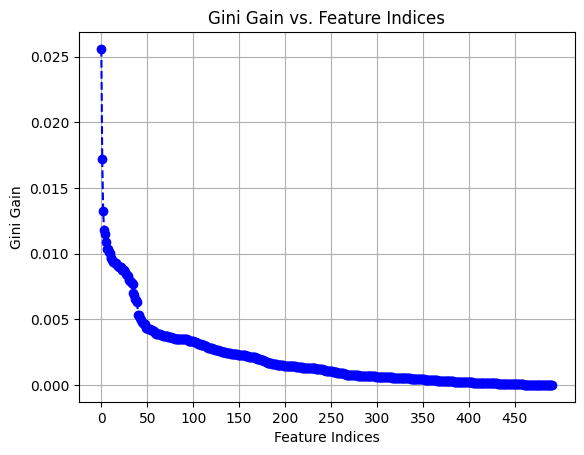

In [ ]:
plt.title("Gini Gain vs. Feature Indices")
plt.xlabel("Feature Indices")
plt.ylabel("Gini Gain")
plt.plot(range(len(importances)), importances[indices], marker='o', linestyle='--', color='b')
plt.xticks(np.arange(0, len(importances), step=50))
plt.grid(True)
plt.show()

In [ ]:
features_names = data.drop('TARGET', axis=1).columns

# Sélectionner les indices des caractéristiques les plus importantes jusqu'à l'indice 250
top_indices = indices[:251]
print(f"Nombre de caractéristiques sélectionnées: {len(top_indices)}")

# Conserver les noms des caractéristiques sélectionnées dans une liste
selected_features = [features_names[i] for i in top_indices]
print("Selected features:", selected_features)

Nombre de caractéristiques sélectionnées: 251
Selected features: ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'Unnamed: 0', 'AMT_ANNUITY', 'DAYS_EMPLOYED', 'INSTA_AMT_PAYMENT', 'PREV_DAYS_LAST_DUE_1ST_VERSION', 'INSTA_AMT_INSTALMENT', 'AMT_CREDIT', 'DAYS_LAST_PHONE_CHANGE', 'INSTA_DAYS_ENTRY_PAYMENT', 'POS_CNT_INSTALMENT_FUTURE', 'PREV_DAYS_DECISION', 'INSTA_DAYS_INSTALMENT', 'PREV_HOUR_APPR_PROCESS_START', 'PREV_AMT_APPLICATION', 'PREV_AMT_ANNUITY', 'PREV_AMT_CREDIT', 'PREV_AMT_GOODS_PRICE', 'PREV_SELLERPLACE_AREA', 'PREV_DAYS_FIRST_DUE', 'INSTA_NUM_INSTALMENT_NUMBER', 'AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE', 'AMT_GOODS_PRICE', 'POS_MONTHS_BALANCE_x', 'POS_CNT_INSTALMENT', 'PREV_DAYS_LAST_DUE', 'PREV_CNT_PAYMENT', 'PREV_DAYS_TERMINATION', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'POS_NAME_CONTRACT_STATUS_Completed_x', 'POS_NAME_CONTRACT_STATUS_Active_x', 'INSTA_NUM_INSTALMENT_VERSION', 'PREV_AMT_DOWN_PAYMENT', 'PREV_RATE_DOWN_PAYMEN

In [ ]:
from pycaret.classification import ClassificationExperiment
from pycaret.classification import compare_models

df_selected = data[features + ['TARGET']]

s = ClassificationExperiment()
s.setup(data=df_selected, target='TARGET', session_id=42)

best = s.compare_models()

,Description,Value
0,Session id,42
1,Target,TARGET
2,Target type,Binary
3,Original data shape,"(307511, 201)"
4,Transformed data shape,"(307511, 201)"
5,Transformed train set shape,"(215257, 201)"
6,Transformed test set shape,"(92254, 201)"
7,Numeric features,200
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9197,0.7678,0.0299,0.5445,0.0566,0.0486,0.1134,37.1070
gbc,Gradient Boosting Classifier,0.9195,0.7621,0.0123,0.5678,0.0241,0.0207,0.0747,435.5090
rf,Random Forest Classifier,0.9194,0.7137,0.0016,0.7150,0.0031,0.0028,0.0304,195.8730
et,Extra Trees Classifier,0.9193,0.7133,0.0014,0.7300,0.0028,0.0025,0.0290,127.5240
dummy,Dummy Classifier,0.9193,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.7760
lr,Logistic Regression,0.9192,0.6498,0.0007,0.2442,0.0015,0.0011,0.0098,85.5030
ridge,Ridge Classifier,0.9192,0.7513,0.0002,0.2167,0.0005,0.0003,0.0052,2.8690
ada,Ada Boost Classifier,0.9191,0.7514,0.0180,0.4648,0.0347,0.0288,0.0788,86.5800
xgboost,Extreme Gradient Boosting,0.9183,0.7573,0.0485,0.4483,0.0874,0.0728,0.1265,22.1550
lda,Linear Discriminant Analysis,0.9181,0.7513,0.0360,0.4126,0.0662,0.0540,0.1025,12.6450


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

test shap

In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.0 MB/s eta 0:00:00


In [ ]:
shap_values_liste = shap_values

.values =
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

.base_values =
array([-0.09526374, -0.09526374, -0.09526374, ..., -0.09526374,
       -0.09526374, -0.09526374])

.data =
array([[ 0.        , -0.20083542, -0.01119403, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.44569758,  0.59676617, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.7050543 , -1.00348259, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.30239766,  0.28059701, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.26857978, -0.25970149, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.29745196,  1.33855721, ...,  0.        ,
         0.        ,  0.        ]])

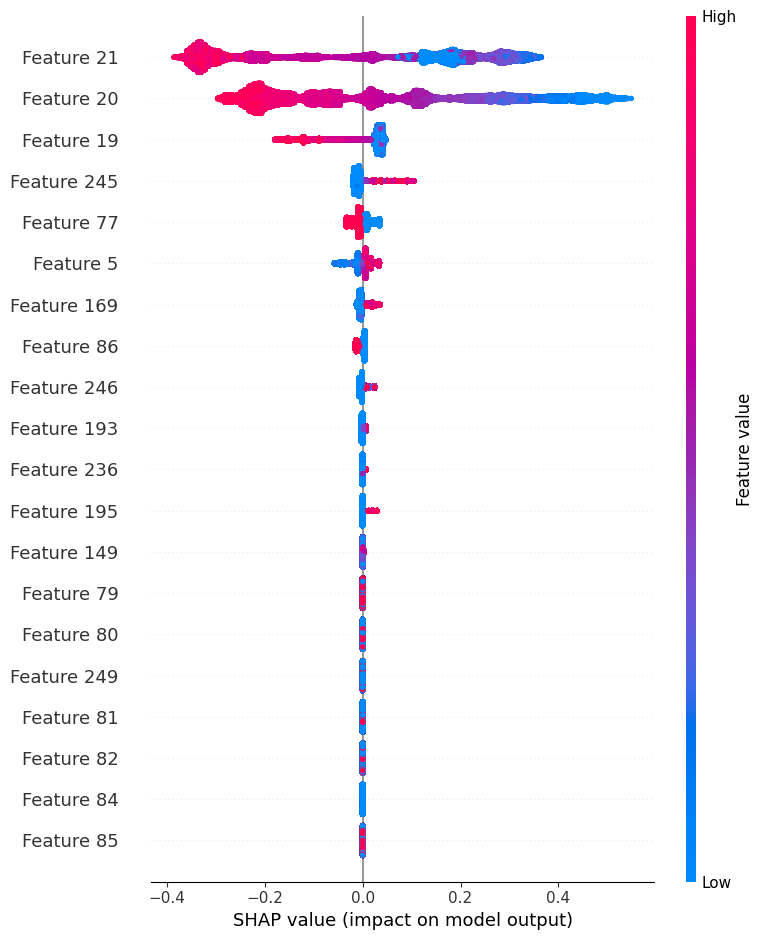

In [ ]:
shap.summary_plot(shap_values, X_train_transformed)

In [ ]:
import numpy as np
import pandas as pd


def analyze_shap_values(shap_values, feature_names, prediction_index=0):
    """
    Analyser les valeurs SHAP pour une prédiction spécifique.

    :param shap_values: Objet SHAP contenant .values, .base_values, et .data
    :param feature_names: Liste des noms des caractéristiques
    :param prediction_index: Index de la prédiction à analyser (par défaut 0)
    :return: DataFrame avec l'analyse
    """
    # Extraire les valeurs pour la prédiction spécifique
    values = shap_values.values[prediction_index]
    data = shap_values.data[prediction_index]
    base_value = shap_values.base_values[prediction_index]

    # Créer un DataFrame avec les informations
    df = pd.DataFrame({'Feature': feature_names, 'SHAP Value': values, 'Feature Value': data, 'Impact': np.abs(values)})

    # Filtrer les valeurs non nulles et trier par impact
    df = df[df['SHAP Value'] != 0].sort_values('Impact', ascending=False).reset_index(drop=True)

    # Calculer l'impact cumulatif
    df['Cumulative Impact'] = df['SHAP Value'].cumsum() + base_value

    return df


def explain_credit_decision(analysis_df, base_value):
    """
    Générer une explication en langage naturel de la décision de crédit.

    :param analysis_df: DataFrame résultant de analyze_shap_values
    :param base_value: Valeur de base de la prédiction
    :return: Explication textuelle
    """
    final_prediction = analysis_df['Cumulative Impact'].iloc[-1]
    decision = "accordé" if final_prediction > 0.5 else "refusé"

    explanation = f"La décision de crédit est : {decision}. "
    explanation += f"La valeur de base était de {base_value:.4f}. "
    explanation += "Les facteurs les plus importants sont :\n"

    for _, row in analysis_df.head(5).iterrows():
        impact = "augmenté" if row['SHAP Value'] > 0 else "diminué"
        explanation += f"- {row['Feature']} a {impact} la probabilité de {abs(row['SHAP Value']):.4f} "
        explanation += f"(valeur : {row['Feature Value']:.4f})\n"

    return explanation


# Utilisation des fonctions
# Supposons que nous ayons déjà les objets shap_values et feature_names

analysis = analyze_shap_values(shap_values, feature_names)
explanation = explain_credit_decision(analysis, shap_values.base_values[0])

print(analysis)
print("\nExplication :")
print(explanation)